In [1]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
%matplotlib widget

In [3]:
#set a random seed for reproducibility
np.random.seed(42)

#generate random values for x
x = np.random.rand(100) * 10  # 100 random values between 0 and 10

#generate y values based on a linear function with some noise
y = 2 * x + np.random.normal(0, 1, 100)  
# y = 2x + noise   y=mx + b, m=slope, b=y-intercept, x is the independent variable

In [4]:
#create a figure and scatter plot with labels
# plt.figure(figsize=(10, 6))
# plt.scatter(x, y, color='blue', label='Data points')
# plt.title('Scatter Plot of Randomly Generated Data')
# plt.xlabel('Independent Variable (x)')
# plt.ylabel('Dependent Variable (y)')
# plt.legend()
# plt.grid(True)
# plt.show()


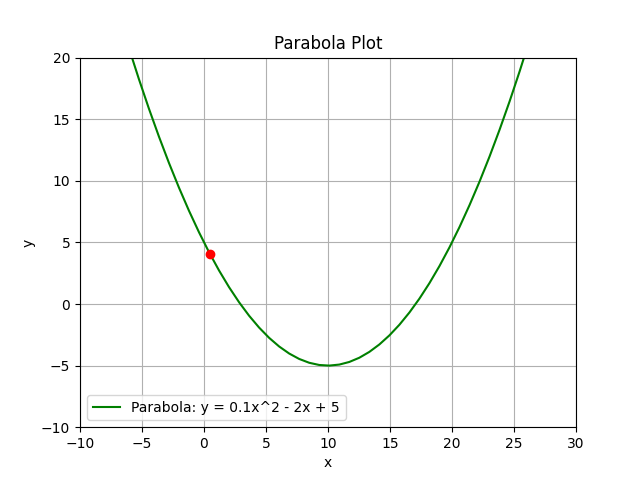

In [15]:
# make a graph that shows a parabola
# Create a new figure for the parabola
fig_parabola, ax_parabola = plt.subplots()
# Generate x values for the parabola
x_parabola = np.linspace(-40, 40, 100)
# Generate y values for the parabola (y = ax^2 + bx + c)
y_parabola = 0.1 * x_parabola**2 - 2 * x_parabola + 5
# derivative equation is dy/dx = 2ax + b
# slope equation then with numbers filled in is slope = 0.1 * x_parabola - 2
# Plot the parabola
ax_parabola.plot(x_parabola, y_parabola, color='green', label='Parabola: y = 0.1x^2 - 2x + 5')
# Add labels and title
ax_parabola.set_title('Parabola Plot')
ax_parabola.set_xlabel('x')
ax_parabola.set_ylabel('y')
ax_parabola.legend()
# Add grid for better readability
ax_parabola.grid(True)
# zoom out to see the whole parabola twice
ax_parabola.set_xlim(-10, 30)
ax_parabola.set_ylim(-10, 20)
#set a red point on the parabola at x=25
ax_parabola.plot(25, 0.1 * 25**2 - 2 * 25 + 5, 'ro')  # Red point at x=25

#animate the red point moving fast down the parabola
def update_parabola(frame):
    # Calculate the new x position for the red point
    x_red = 25 - frame * 0.5  # Move left along the parabola
    if x_red < -10:  # Stop moving when x is less than -10
        x_red = -10
    y_red = 0.1 * x_red**2 - 2 * x_red + 5
    # Update the red point's position
    ax_parabola.lines[1].set_data([x_red], [y_red])
    return ax_parabola.lines[1],

# Create animation for the red point
ani_parabola = FuncAnimation(fig_parabola, update_parabola, frames=np.arange(0, 50), interval=100, blit=True)

# Display the animation in the notebook
HTML(ani_parabola.to_jshtml())

# Show the parabola plot
# plt.show()

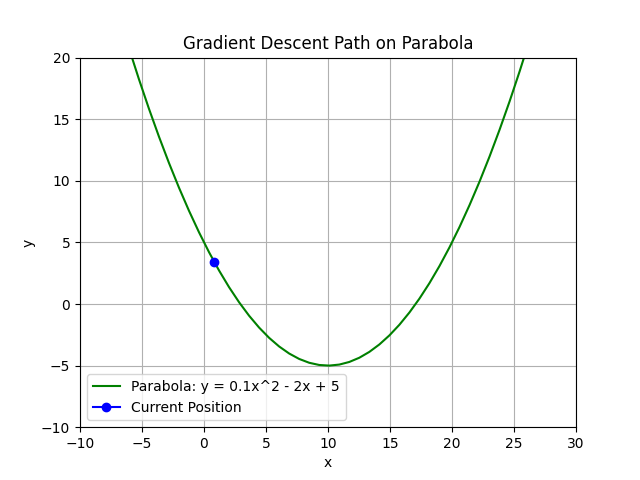

In [ ]:
# base parabola function: y = 0.1 * x**2 - 2 * x + 5
# corrected parabola derivative: dy/dx = 0.2 * x - 2
# slope equation: slope = 0.2 * x - 2

# x value
x = -5  # Starting point for gradient descent
# learning_rate
learning_rate = 0.1  # Step size for gradient descent
# iterations
iterations = 50  # Number of steps in the gradient descent

# list for storing x and y values
x_history = []
y_history = []

# Gradient Descent Simulation
for i in range(iterations):
    # Calculate the y value based on the parabola function
    y = 0.1 * x**2 - 2 * x + 5
    # Store the current x and y values
    x_history.append(x)
    y_history.append(y)
    #print(f"Iteration {i+1}: x = {x:.2f}, y = {y:.2f}")
    # Calculate the slope (derivative) at the current x value
    slope = 0.2 * x - 2
    #print(f"Slope at x = {x:.2f} is {slope:.2f}")
    # Update x value using gradient descent step
    x -= learning_rate * slope
    
#animate the path taken by the gradient descent
fig_gradient, ax_gradient = plt.subplots()
# Plot the parabola
ax_gradient.plot(x_parabola, y_parabola, color='green', label='Parabola: y = 0.1x^2 - 2x + 5')
# Initialize a single marker at the starting position (no line or trail)
current_point, = ax_gradient.plot([x_history[0]], [y_history[0]], marker='o', color='blue', label='Current Position')
# Add labels and title
ax_gradient.set_title('Gradient Descent Path on Parabola')
ax_gradient.set_xlabel('x')
ax_gradient.set_ylabel('y')
ax_gradient.legend()
# Add grid for better readability
ax_gradient.grid(True)
# Set limits to see the whole parabola and path
ax_gradient.set_xlim(-10, 30)
ax_gradient.set_ylim(-10, 20)
# Create animation for the gradient descent path
def update_gradient(frame):
    # Update the marker to show only the current position
    if frame < len(x_history):
        current_point.set_xdata([x_history[frame]])
        current_point.set_ydata([y_history[frame]])
    return current_point,
# Create animation for the gradient descent path
ani_gradient = FuncAnimation(fig_gradient, update_gradient, frames=np.arange(0, len(x_history)), interval=500, blit=True)
# Display the animation in the notebook
HTML(ani_gradient.to_jshtml())